In [1]:
import numpy as np
import pandas as pd

from src.sampling import (
	PairwiseRandomSampler,
	PairwiseWindowedSampler,
	BiasedWindowedSampler,
	BiasedRandomSampler
)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
N = 50

pointwise = (
	pd.DataFrame(list(range(N)), columns=["docno"])
	.sort_values("docno", ascending=False)
	.reset_index(drop=True)
	.reset_index()
	.rename({
		"index": "score",
	}, axis=1)
	.sort_values("docno")
)

,score,docno
49,49,0
48,48,1
47,47,2
46,46,3
45,45,4
44,44,5
43,43,6
42,42,7
41,41,8
40,40,9


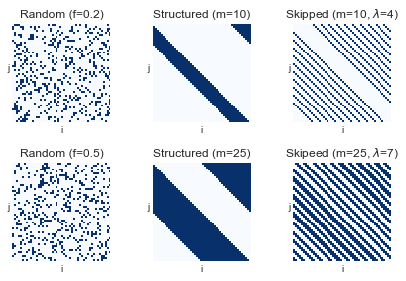

In [12]:
figure, axes = plt.subplots(2, 3, sharex="all", sharey="all", figsize=(6, 4))

kwargs = {"cbar": None, "cmap": "Blues", "vmin": 0, "vmax": 1, "square":True, "xticklabels": False, "yticklabels": False}

sns.heatmap(
	(
		PairwiseRandomSampler(0.2, l = 0)(pointwise)
		.rename({"id_a": "i", "id_b": "j"}, axis=1)
		.assign(value=1)
		.pivot("i","j","value")
		.fillna(0)
		.values
	), ax=axes[0][0], **kwargs)
sns.heatmap(
	(
		PairwiseRandomSampler(0.2, l = 0)(pointwise)
		.rename({"id_a": "i", "id_b": "j"}, axis=1)
		.assign(value=1)
		.pivot("i","j","value")
		.fillna(0)
		.values
	), ax=axes[1][0], **kwargs)
sns.heatmap(
	(
		PairwiseWindowedSampler(10, cyclical=True)(pointwise)
		.rename({"id_a": "i", "id_b": "j"}, axis=1)
		.assign(value=1)
		.pivot("i","j","value")
		.fillna(0)
		.values
	), ax=axes[0][1], **kwargs)
sns.heatmap(
	(
		PairwiseWindowedSampler(25, cyclical=True)(pointwise)
		.rename({"id_a": "i", "id_b": "j"}, axis=1)
		.assign(value=1)
		.pivot("i","j","value")
		.fillna(0)
		.values
	), ax=axes[1][1], **kwargs)
sns.heatmap(
	(
		PairwiseWindowedSampler(10, window_dilation=4, cyclical=True)(pointwise)
		.rename({"id_a": "i", "id_b": "j"}, axis=1)
		.assign(value=1)
		.pivot("i","j","value")
		.fillna(0)
		.values
	), ax=axes[0][2], **kwargs)
sns.heatmap(
	(
		PairwiseWindowedSampler(25, window_dilation=9, cyclical=True)(pointwise)
		.rename({"id_a": "i", "id_b": "j"}, axis=1)
		.assign(value=1)
		.pivot("i","j","value")
		.fillna(0)
		.values
	), ax=axes[1][2], **kwargs)

axes[0][0].set_title("Random (f=0.2)")
axes[1][0].set_title("Random (f=0.5)")
axes[0][1].set_title("Structured (m=10)")
axes[1][1].set_title("Structured (m=25)")
axes[0][2].set_title("Skipped (m=10, $\lambda$=4)")
axes[1][2].set_title("Skipped (m=25, $\lambda$=7)")

for subax in axes:
	for ax in subax:
		ax.set_xlabel("i")
		ax.set_ylabel("j", rotation=0)


plt.tight_layout()
figure.savefig("../reports/figures/comparison-matrices.pdf", dpi=300)